In [3]:
# import the library
import tensorflow as tf  
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras import callbacks
from sklearn.model_selection import train_test_split

In [4]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
# Multi-label Encoding
def  multi_label_encoding(y):
  animals = [ 3, 4, 5, 6, 7]
  vehicles = [0, 1, 8, 9]
  fly = [0,2]
  walk = [2, 3, 4, 5, 9]
  jump = [3, 4, 5, 6, 7]
  swim = [3, 4, 6, 7, 8 ]
  new_y = np.zeros((len(y), 6), dtype=np.uint8)
  copy_y= y.copy()
  for i in range(0, len(y)):
    if copy_y[i] in animals:
      new_y[i][0] = 1
    if copy_y[i] in vehicles:
      new_y[i][1] = 1
    if copy_y[i] in fly:
      new_y[i][2] = 1
    if copy_y[i] in walk:
      new_y[i][3] = 1
    if copy_y[i] in jump:
      new_y[i][4] = 1
    if copy_y[i] in swim:
      new_y[i][5] = 1
  return  new_y

def scale_pixel(x):
  # convert from integers to floats
  new_x = x.astype('float32')
  # normalize to range 0-1
  new_x = new_x / 255.0
  return new_x

Y_train = multi_label_encoding(y_train)
y_test = multi_label_encoding(y_test)
X_train = scale_pixel(x_train)
x_test = scale_pixel(x_test)
x_val, x_train,y_val,y_train= train_test_split(X_train, Y_train, test_size = 0.8)

In [6]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(6, activation='sigmoid'))
	# compile model
	opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-5, amsgrad=False)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

def summarize_diagnostics(history):
  # plot loss
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
  # save plot to file
  filename = sys.argv[0].split('/')[-1]
  #pyplot.savefig(filename + '_plot.png')
  pyplot.show()

# New Section

In [8]:
# run the test harness for evaluating a model
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=10, restore_best_weights=True)

def run_test_harness():
  model = define_model()
	# fit model
  history = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=2, callbacks=[es,es])
	# evaluate model
  _, acc = model.evaluate(x_test, y_test, verbose=0)
  print('> %.3f' % (acc * 100.0))
	# learning curves
  summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

60.33


[1 0 0 1 0 0]
Animal
Walk


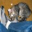

[0 1 0 0 0 1]
Vehicle
Swim


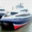

[0 1 0 0 0 1]
Vehicle
Swim


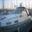

[0 1 1 0 0 0]
Vehicle
Fly


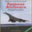

[1 0 0 0 1 0]
Animal
Jump


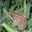

[1 0 0 0 1 0]
Animal
Jump


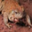

[0 1 0 1 0 0]
Vehicle
Walk


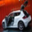

[1 0 0 0 1 0]
Animal
Jump


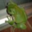

[1 0 0 1 0 0]
Animal
Walk


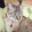

[0 1 0 1 0 0]
Vehicle
Walk


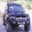

[0 1 0 0 0 1]
Vehicle
Swim


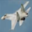

[0 1 0 1 0 0]
Vehicle
Walk


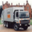

[1 0 0 1 0 0]
Animal
Walk


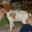

[1 0 0 0 1 0]
Animal
Jump


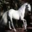

[0 1 0 1 0 0]
Vehicle
Walk


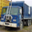

[0 1 0 0 1 1]
Vehicle
Jump
Swim


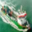

[1 0 0 1 0 0]
Animal
Walk


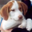

[1 0 0 0 1 0]
Animal
Jump


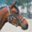

[0 1 0 0 0 1]
Vehicle
Swim


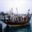

[1 0 0 0 1 0]
Animal
Jump


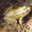

[1 0 0 0 1 0]
Animal
Jump


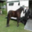

[0 1 1 0 0 0]
Vehicle
Fly


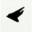

[1 0 0 0 0 0]
Animal


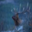

[0 1 0 1 0 0]
Vehicle
Walk


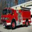

[1 0 0 1 0 0]
Animal
Walk


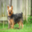

[1 0 0 0 0 0]
Animal


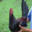

[1 0 0 1 0 0]
Animal
Walk


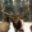

[0 1 1 0 0 0]
Vehicle
Fly


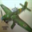

[0 1 0 1 0 0]
Vehicle
Walk


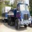

[1 0 0 0 1 0]
Animal
Jump


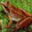

[1 0 0 0 1 0]
Animal
Jump


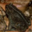

[1 0 0 1 0 0]
Animal
Walk


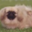

[1 0 0 1 0 0]
Animal
Walk


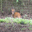

[1 0 0 1 0 0]
Animal
Walk


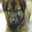

[0 1 0 1 0 0]
Vehicle
Walk


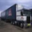

[0 1 0 1 0 0]
Vehicle
Walk


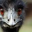

[1 0 0 1 0 0]
Animal
Walk


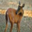

[0 1 0 1 0 0]
Vehicle
Walk


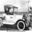

KeyboardInterrupt: ignored

In [ ]:
import IPython.display as dp
from PIL import Image
for j in range(0, len(x_test)):
  #print(y_test[j])
  y_predict = model.predict(x_test[j].reshape(1, 32, 32, 3))
  s = y_predict[0].copy()
  print(np.around(s).astype(int))
  for i in range(0,len(s)):
    a = np.round(s[i])
    if(a == 1):
      if i == 0:
        print("Animal")
      if i == 1:
        print("Vehicle")
      if i == 2:
        print("Fly")
      if i == 3:
        print("Walk")
      if i == 4:
        print("Jump")
      if i == 5:
        print("Swim")
  image_predicted_1 = x_test[j].copy()
  image_predicted_1 = image_predicted_1.reshape((32, 32, 3))
  image_predicted_1 = image_predicted_1 * 255
  image_predicted_1 = image_predicted_1.astype('uint8')
  dp.display_png(Image.fromarray(image_predicted_1))

# New Section